## DIABETES 130-US HOSPITALS FOR YEARS 1999-2008

## 1.0 Introduction.

The Diabetes 130-US Hospitals (1999–2008) dataset contains ten years of clinical care records from 130 U.S. hospitals, capturing key details about diabetic patients, including laboratory tests, medications, and hospital stays of up to 14 days.

One of the major challenges in diabetes management is the high rate of hospital readmissions, particularly within 30 days of discharge. Despite advances in preventive care and therapeutic interventions, many diabetic patients continue to experience inadequate management, leading to poor glycemic control and frequent hospital visits. These readmissions not only increase hospital costs but also contribute to worse patient outcomes, including a higher risk of complications and mortality.

By leveraging data analysis and predictive modeling, we can gain valuable insights into the factors influencing readmissions. Identifying high-risk patients early can help optimize care, improve treatment strategies, and reduce healthcare burdens.

## 1.1 Problem statement
Hospital readmissions, especially within 30 days of discharge, pose significant challenges in diabetes management. Despite advancements in preventive and therapeutic interventions, many diabetic patients experience inadequate care, leading to frequent hospital readmissions. This issue not only increases healthcare costs but also negatively impacts patient outcomes.

Using the Diabetes 130-US Hospitals (1999–2008) dataset, this project aims to develop a binary classification model to predict whether a diabetic patient will be readmitted within 30 days. By leveraging machine learning techniques, including handling missing values, feature engineering, and model optimization, we seek to identify key factors influencing readmissions and provide actionable insights to improve diabetes care and hospital management.

## 1.2 Objectives  
1. Develop a classification model to predict 30-day hospital readmissions for diabetic patients.  
2. Identify key factors influencing readmission risk, including demographics, treatment history etc.
3. Evaluate the model’s predictive accuracy for effective hospital resource management.  
4. Provide actionable insights to improve diabetes care and reduce readmission rates.  
5. Support data-driven decision-making for healthcare policies and patient management strategies.  



## 1.3 Limitations of the Data

1. **High Missing Values** – The dataset contains a significant number of missing or incomplete records, which may impact model performance.    
2. **Limited Socioeconomic Factors** – The dataset lacks critical socioeconomic variables (e.g., income, education) that could influence hospital readmissions.  
3. **Data Source Constraints** – Collected from 130 U.S. hospitals between 1999-2008, making it less generalizable to current healthcare settings.  
  


# 2.0 Data Inspection

**1. Loading the dataset**

In [1]:
import pandas as pd


In [2]:
df1 = pd.read_csv("D:\PROJECT\Diabetes_130-US_Hospitals_1999-2008\diabetic_data.csv")

In [3]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
len(df1.columns), df1.columns

(50,
 Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
        'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
        'time_in_hospital', 'payer_code', 'medical_specialty',
        'num_lab_procedures', 'num_procedures', 'num_medications',
        'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
        'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
        'tolazamide', 'examide', 'citoglipton', 'insulin',
        'glyburide-metformin', 'glipizide-metformin',
        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
        'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
       dtype='object'))

In [6]:
#Checking for datatypes
df1.dtypes.value_counts()

object    37
int64     13
dtype: int64

*From this output, we are working with only objects and numbers on this dataset.*

**Checking the variables on the target variable**

In [6]:
df1['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

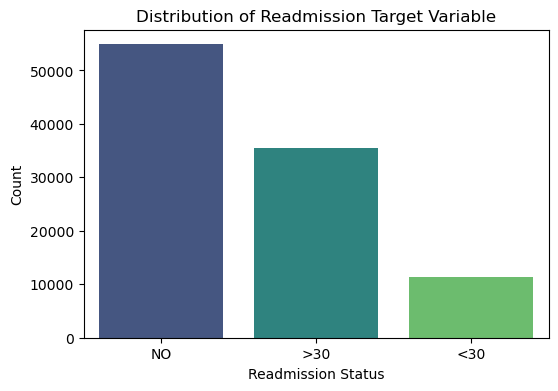

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get value counts
readmitted_counts = df1['readmitted'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=readmitted_counts.index, y=readmitted_counts.values, palette='viridis')
plt.title('Distribution of Readmission Target Variable')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.show()



**Imbalanced Classes:** 

The dataset exhibits a significant class imbalance, with a much larger number of patients classified as "NO" compared to those who are readmitted within 30 days (<30). This imbalance can lead to biased models that may predict the majority class more often, potentially overlooking the minority class.

# DATA CLEANING

## 2.1 Handling the missing values

In [8]:
df1.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

From this out put, the dataset does not have missing values. However, this can be misleading, as health case study records, always have errors and might need to analyze the data more. Some missing values might have been encoded differently.

We will check for:
  
  - Blank spaces
  - "?" or "unknwon" values
  - Special placeholders.


In [9]:
#Checking for unique place holders in categorical columns
for col in df1.select_dtypes(include="object").columns:
    print(f"{col}unique values: {df1[col].unique()}")

raceunique values: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
genderunique values: ['Female' 'Male' 'Unknown/Invalid']
ageunique values: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weightunique values: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
payer_codeunique values: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialtyunique values: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' '

In [10]:
import numpy as np

# Replace '?' with NaN in categorical columns
df1.replace('?', np.nan, inplace=True)


In [11]:
# Check for placeholders in numerical columns
for col in df1.select_dtypes(include="number").columns:
    print(f"{col} unique values: {df1[col].unique()}")

encounter_id unique values: [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr unique values: [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
admission_type_id unique values: [6 1 2 3 4 5 8 7]
discharge_disposition_id unique values: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id unique values: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital unique values: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
num_lab_procedures unique values: [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102 100   7  89  91  92   4 101  99 114 113 111 129
 107 

In [12]:
#Recalling the official dataset
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
df1.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Count missing values for each column
missing_values = df1.isnull().sum()

# Filter out columns with no missing values (optional)
missing_values = missing_values[missing_values > 0]

# Display missing values sorted in descending order
print(missing_values.sort_values(ascending=False))


weight               98569
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
dtype: int64


In [15]:
df1.drop(columns=['weight', 'medical_specialty','payer_code','diag_3', 'diag_2', 'diag_1'], inplace=True)


In [17]:
#checking for duplicates
df1.duplicated().sum()


0

In [18]:
#Replace the missing values on the race column with "Unknown"
df1['race'].fillna('Uknown', inplace=True)

In [19]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## EXPLANATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) is an essential step in understanding a dataset before applying machine learning models or making conclusions. It involves summarizing and visualizing key features to identify patterns, relationships, and potential anomalies in the data.

I will focus on the following visualizations.


## 1. Correlation Matrix  
- **correlation map of the features in the ataset** 


## 2. Demographic Insights  
- **Bar Plot**: Count of patients by `race`.  
- **Count Plot**: Gender distribution.  
- **Histogram**: Age distribution   

## 3. Medication Usage  
- **Stacked Bar Plot**: Proportion of `insulin` use across `readmitted` categories.  
- **Heatmap**: Correlation between different medications and readmission.  

## 4. Categorical Feature Impact on Readmission  
- **Stacked Bar Plot**: Compare `readmitted` across gender.  
- **Grouped Bar Plot**: Relationship between `race` and `readmitted`.  
- **Box Plot**: `time_in_hospital` by `readmitted` status.  



#### 1. Correlation matrix

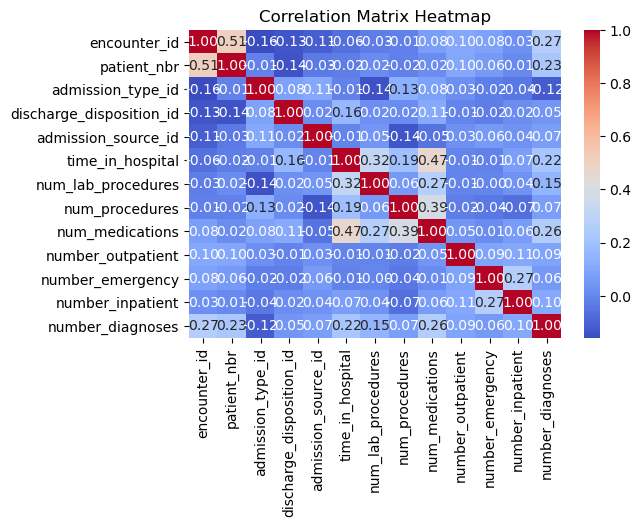

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Top 15 features with the highest correlation greater than 1**

In [21]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Unstack the correlation matrix to get a Series of pairs
correlation_pairs = correlation_matrix.unstack()

# Sort the correlation pairs by absolute value in descending order
sorted_pairs = correlation_pairs.abs().sort_values(ascending=False)

# Remove self-correlations (correlation of a feature with itself)
sorted_pairs = sorted_pairs[sorted_pairs < 1]

# Display the top 10 pairs with the highest correlation
top_correlations = sorted_pairs.head(15)
print(top_correlations)

encounter_id        patient_nbr           0.512028
patient_nbr         encounter_id          0.512028
time_in_hospital    num_medications       0.466135
num_medications     time_in_hospital      0.466135
num_procedures      num_medications       0.385767
num_medications     num_procedures        0.385767
time_in_hospital    num_lab_procedures    0.318450
num_lab_procedures  time_in_hospital      0.318450
                    num_medications       0.268161
num_medications     num_lab_procedures    0.268161
number_emergency    number_inpatient      0.266559
number_inpatient    number_emergency      0.266559
encounter_id        number_diagnoses      0.265149
number_diagnoses    encounter_id          0.265149
                    num_medications       0.261526
dtype: float64


# Univariate Analysis.

#### 2. Demoraphics Insights


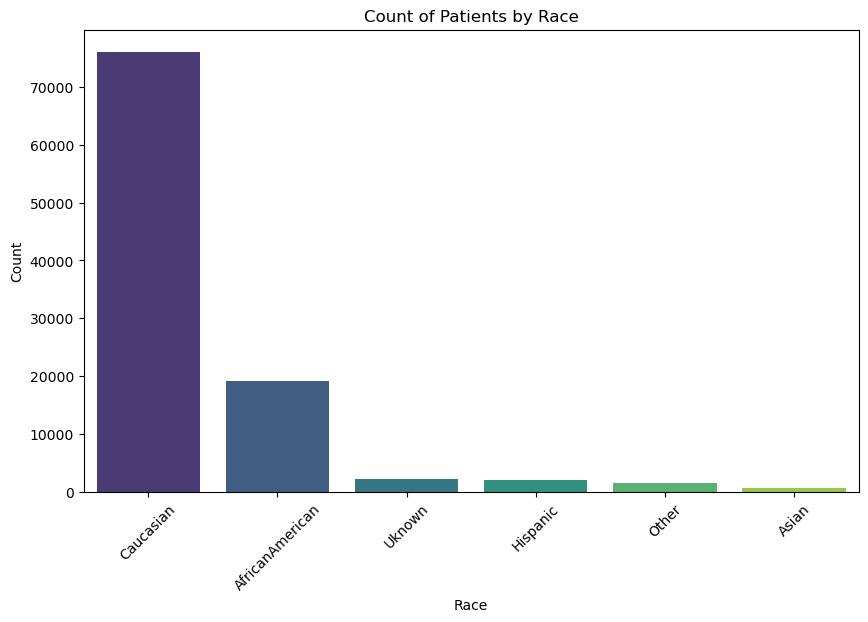

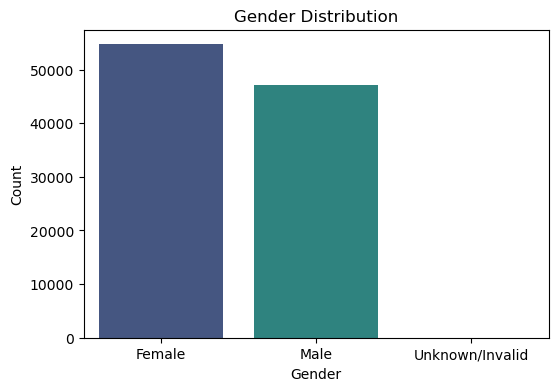

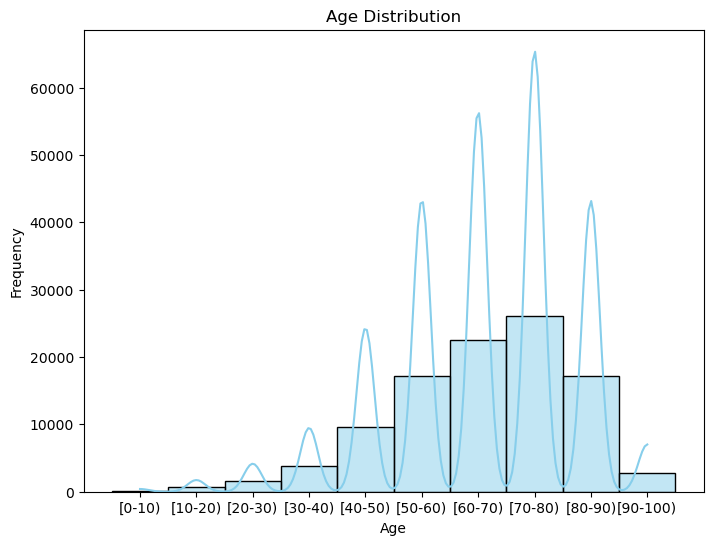

In [22]:
def plot_demographic_insights(df):
    # Bar Plot: Count of patients by race
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='race', order=df['race'].value_counts().index, palette='viridis')
    plt.title('Count of Patients by Race')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Count Plot: Gender distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='gender', palette='viridis')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

    # Histogram: Age distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x='age', bins=10, kde=True, color='skyblue')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()


plot_demographic_insights(df1)

### Combined Analysis of Patient Demographics graphical representations.

### a) Race Distribution
The majority of patients in the dataset are **Caucasian**, followed by **African Americans**. Other racial groups, including Hispanic, Asian, and "Other," are significantly smaller in proportion. The "Unknown" category also has a notable presence, indicating some missing or unrecorded data.

### b) Gender Distribution
The dataset contains more **female patients** than male patients. However, the difference is not drastic. There is also a small percentage of patients whose gender is classified as "Unknown/Invalid."

### c) Age Distribution
The age distribution follows a typical hospital patient demographic trend, with the highest frequencies in the **50-80 age range**. The peak patient groups appear in the **60-70 and 70-80 age categories**, which aligns with the expected increase in medical care needs for older adults. There are fewer younger patients (below 30), indicating that the dataset is likely focused on conditions affecting older populations.

### Insights and Potential Implications
1. **Older Population Dominance:**  
   The patient population is primarily older, indicating that the dataset might be associated with chronic illnesses or age-related conditions.

2. **Racial Disparities in Healthcare Representation:**  
   The overwhelming majority of **Caucasian patients** suggests potential disparities in healthcare access, data collection biases, or regional demographics.

3. **Gender-Based Healthcare Differences:**  
   More **female patients** might suggest either a higher tendency for women to seek medical care or gender-based health differences in the conditions represented in the dataset.

4. **Data Completeness Issues:**  
   The presence of "Unknown" values in race and gender categories suggests some missing or unrecorded information, which could impact data reliability.
  


## **Bivariate Analysis against the target variable**

Analysis of the varibales agaianst the target variable.

## 3. Medication Usage  
- **Stacked Bar Plot**: Proportion of `insulin` use across `readmitted` categories.  
- **Heatmap**: Correlation between different medications and readmission.  

 

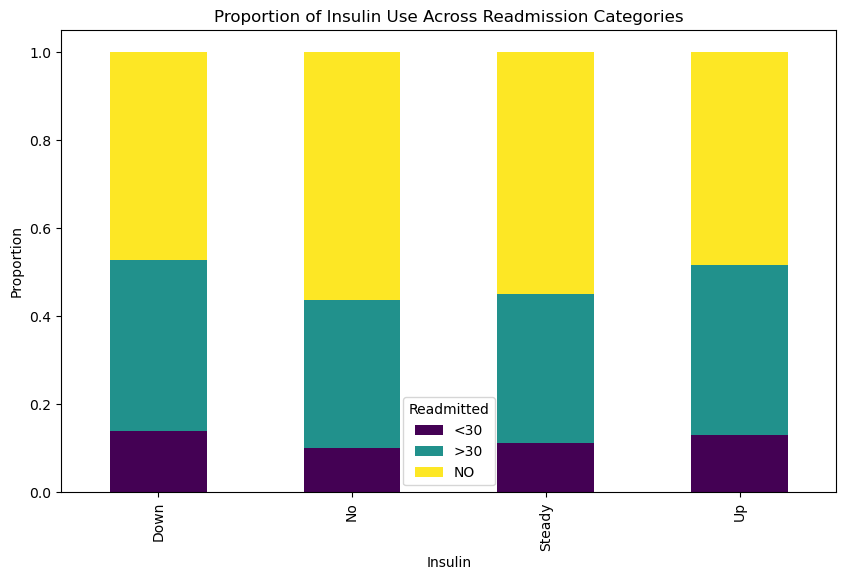

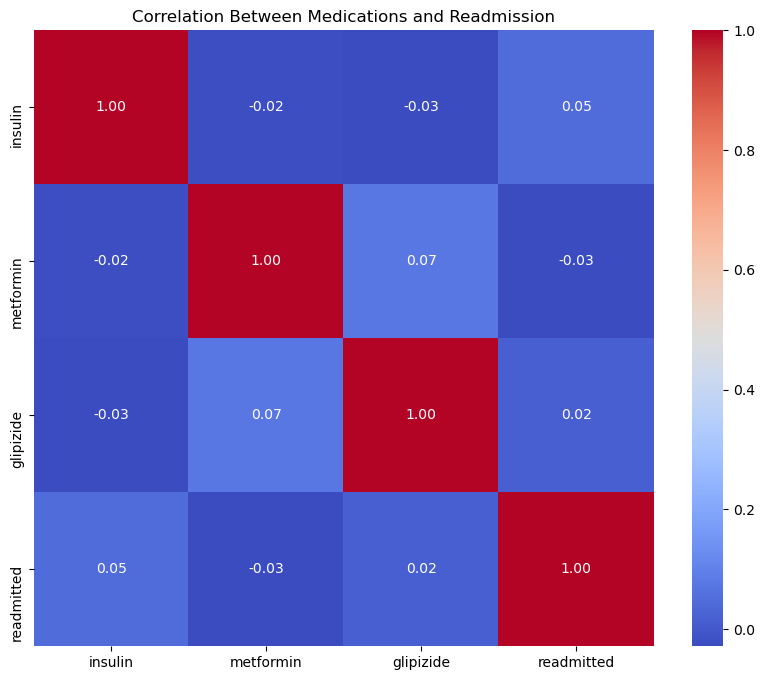

In [23]:
def plot_insulin_usage(df):
    insulin_readmitted = pd.crosstab(df['insulin'], df['readmitted'], normalize='index')
    insulin_readmitted.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title('Proportion of Insulin Use Across Readmission Categories')
    plt.xlabel('Insulin')
    plt.ylabel('Proportion')
    plt.legend(title='Readmitted')
    plt.show()

# Heatmap: Correlation between different medications and readmission
def plot_medication_correlation(df):
    # Assuming medication columns are named like 'insulin', 'metformin', etc.
    medication_cols = ['insulin', 'metformin', 'glipizide']  # Add more medication columns as needed
    medication_corr = df[medication_cols + ['readmitted']].apply(lambda x: pd.factorize(x)[0]).corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(medication_corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Between Medications and Readmission')
    plt.show()


plot_insulin_usage(df1)
plot_medication_correlation(df1)

### Insights from the Visualizations

### 1. Proportion of Insulin Use Across Readmission Categories
- Patients who did not take insulin (`No`) have the highest proportion of non-readmission (`NO`), compared to those who had changes in insulin dosage. This means that when a patient constantly takes insulin, the readmission of the patient is highly unlikely.
- The `<30` readmission category is the smallest across all insulin groups.
- Patients with steady or increased insulin usage (`Steady` and `Up`) tend to have higher non-readmission rates compared to those who decreased insulin (`Down`).

### 2. Correlation Between Medications and Readmission
- The heatmap displays the correlation between the medications (insulin, metformin, glipizide) and readmission status.
- There is no strong correlation between any individual medication and readmission.
- The highest correlation values are very close to zero, suggesting that insulin, metformin, and glipizide do not have a significant direct impact on readmission rates.
- Insulin has a slight positive correlation with readmission (0.05), while metformin and glipizide show minimal impact.

### Key Takeaways
- The type of insulin usage seems to influence readmission rates slightly, but a significant portion of patients in all insulin categories are not readmitted.
- No single diabetes medication strongly predicts readmission, indicating that other factors (e.g., patient condition, comorbidities, adherence) may play a bigger role in hospital readmissions.


## 4. Categorical Feature Impact on Readmission  
- **Stacked Bar Plot**: Compare `readmitted` across gender.  
- **Grouped Bar Plot**: Relationship between `race` and `readmitted`.  
- **Box Plot**: `time_in_hospital` by `readmitted` status. 

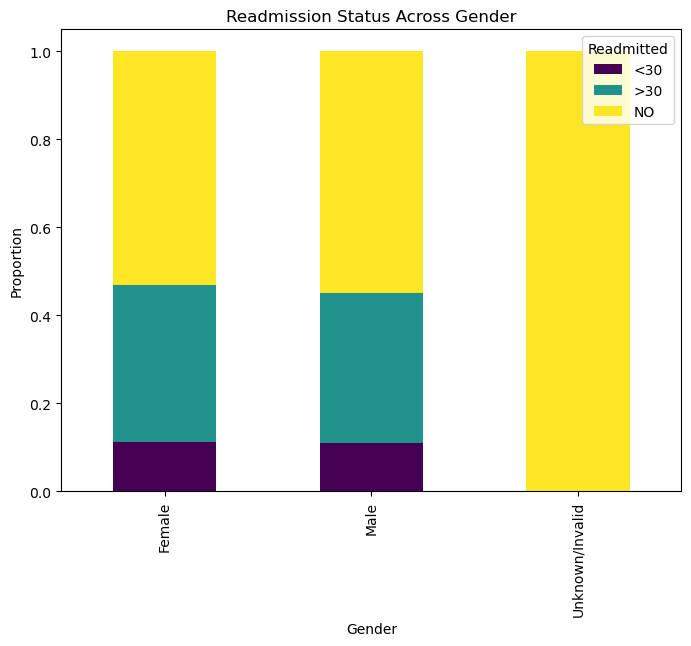

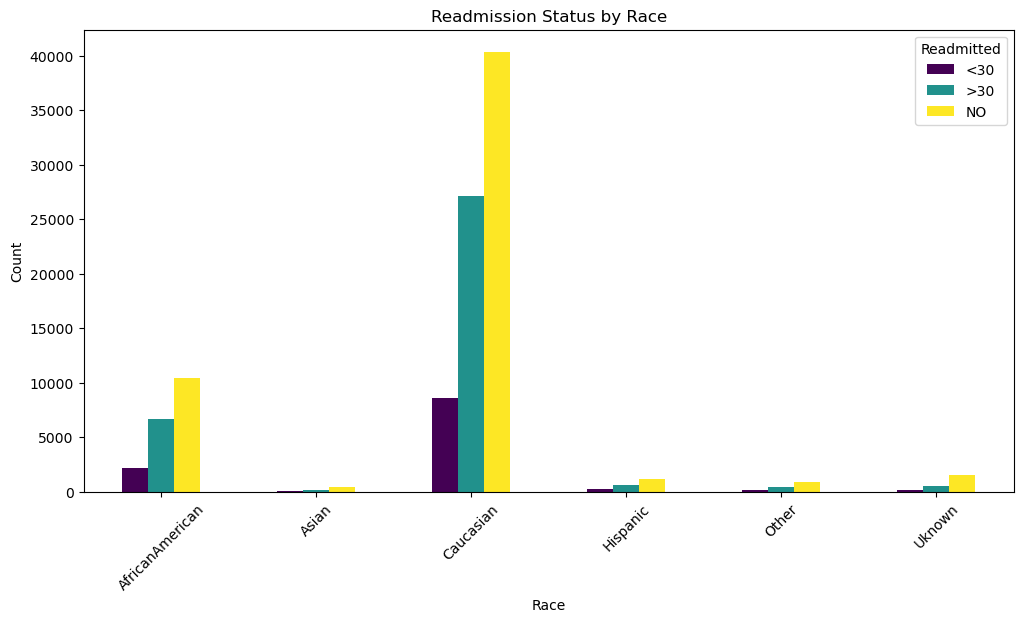

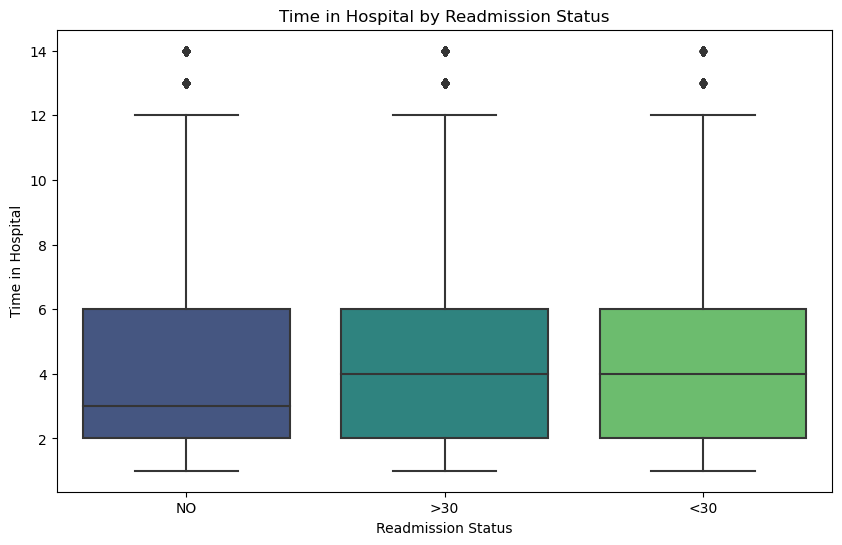

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Stacked Bar Plot: Compare readmitted across gender
def plot_gender_readmission(df):
    gender_readmitted = pd.crosstab(df['gender'], df['readmitted'], normalize='index')
    gender_readmitted.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
    plt.title('Readmission Status Across Gender')
    plt.xlabel('Gender')
    plt.ylabel('Proportion')
    plt.legend(title='Readmitted')
    plt.show()

# Grouped Bar Plot: Relationship between race and readmitted
def plot_race_readmission(df):
    race_readmitted = pd.crosstab(df['race'], df['readmitted'])
    race_readmitted.plot(kind='bar', figsize=(12, 6), colormap='viridis')
    plt.title('Readmission Status by Race')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Readmitted')
    plt.show()

# Box Plot: time_in_hospital by readmitted status
def plot_time_in_hospital(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='readmitted', y='time_in_hospital', palette='viridis')
    plt.title('Time in Hospital by Readmission Status')
    plt.xlabel('Readmission Status')
    plt.ylabel('Time in Hospital')
    plt.show()

plot_gender_readmission(df1)
plot_race_readmission(df1)
plot_time_in_hospital(df1)

- **Readmission rates do not appear to be significantly influenced by gende**
- **Race seems to be a factor in readmission rates, particularly for African American patients, who appear to have a relatively higher proportion of readmissions compared to other racial groups.**
- **Caucasian patients form the majority of the dataset, which means their numbers may dominate overall trends.**

# OUTLIERS

### Handling outliers.

I will use z-core and Cap or Floor Outliersto handle and visualize outliers.

In [25]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df1.select_dtypes(include=[np.number])))

# Define a threshold (commonly 3)
threshold = 3
outliers = np.where(z_scores > threshold)
outliers



(array([     0,      0,     66, ..., 101755, 101757, 101765], dtype=int64),
 array([ 3, 12, 12, ...,  5,  1,  1], dtype=int64))

**z-score does not work well with imbalanced dataset, if the minority class inherently has extreme values, treating them as outliers could reduce model performance by removing valuable signals.**
**Out dataset is highly imbalanced hence we will use another method to hamdle outliers.**


In [26]:

# Cap or floor outliers
df1_capped = df1.copy()
for col in df1.select_dtypes(include=[np.number]).columns:
    col_min = df1[col].quantile(0.05)
    col_max = df1[col].quantile(0.95)
    df1_capped[col] = np.where(df1[col] < col_min, col_min, df1[col])
    df1_capped[col] = np.where(df1[col] > col_max, col_max, df1[col])


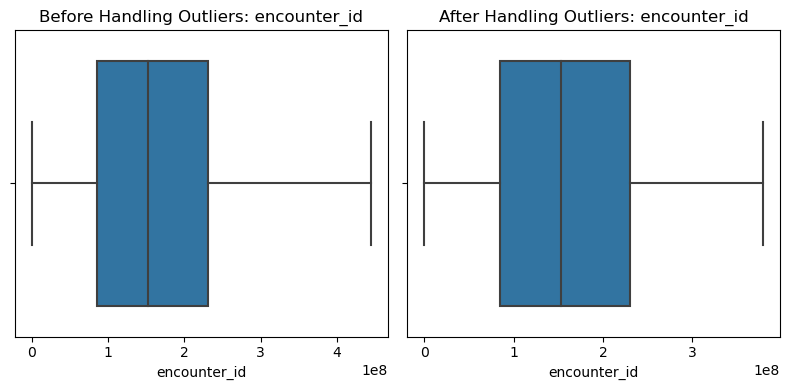

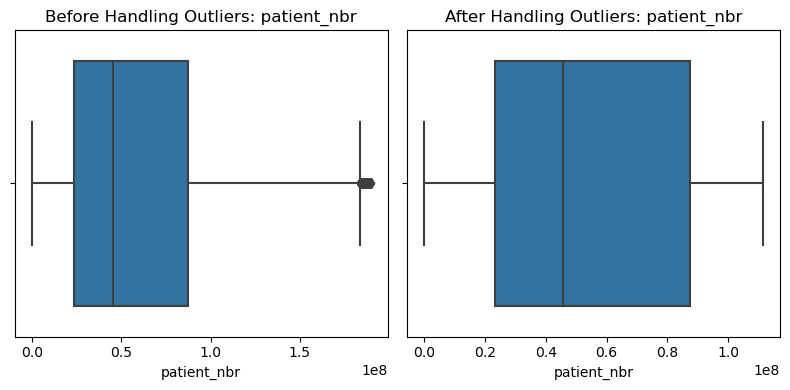

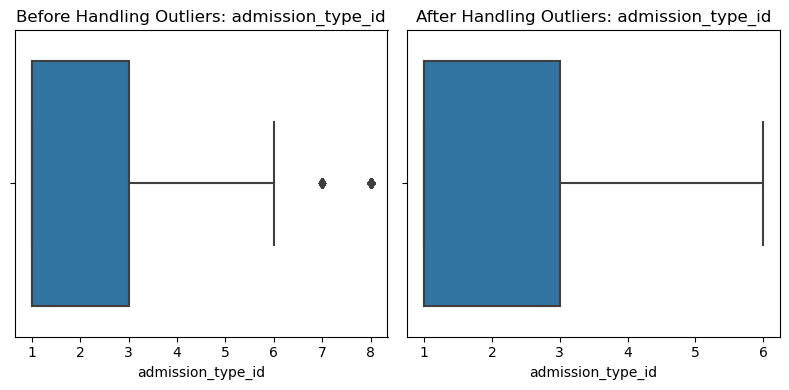

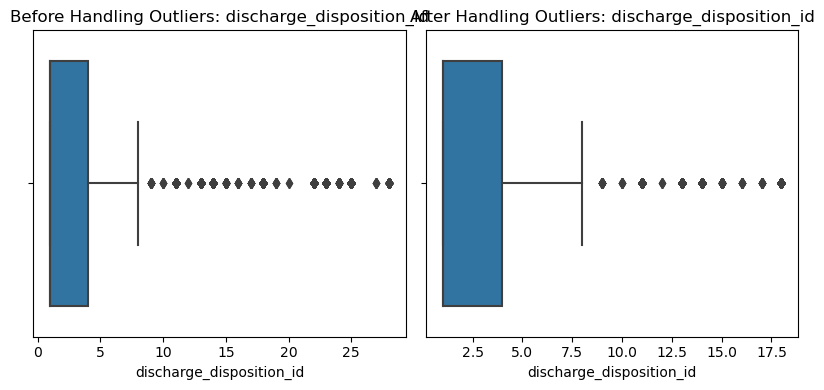

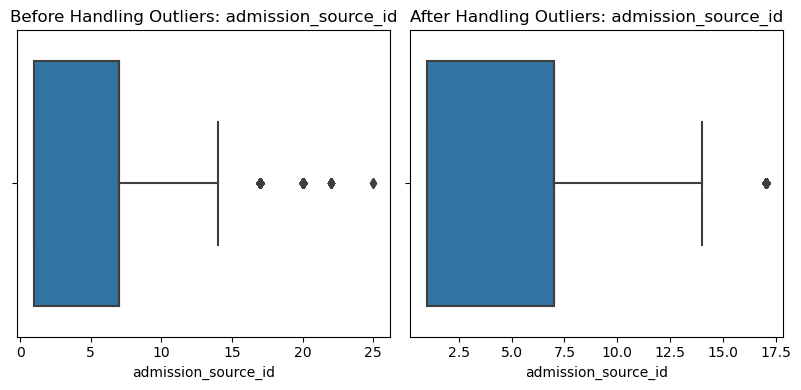

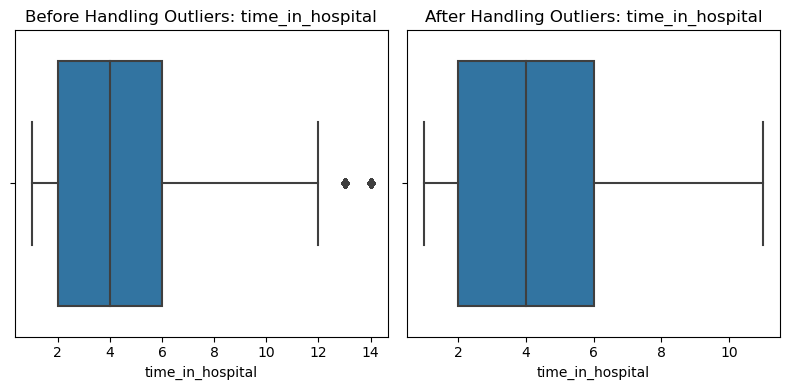

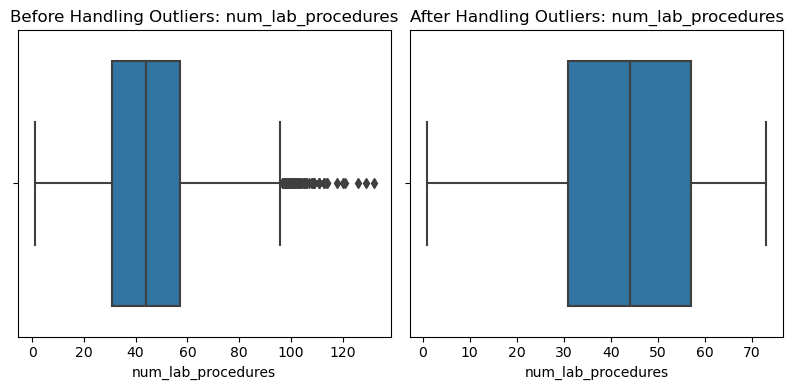

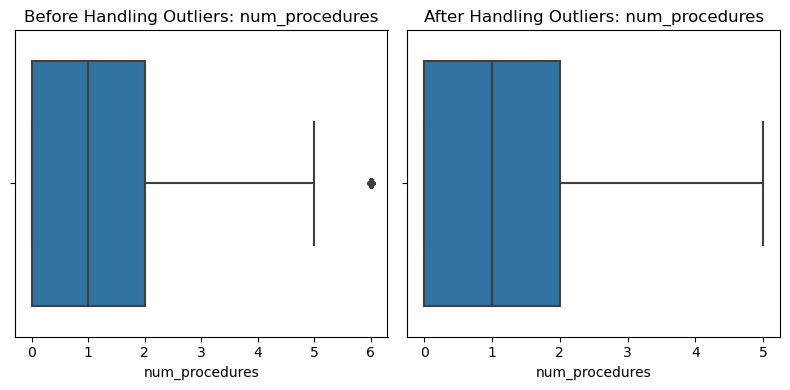

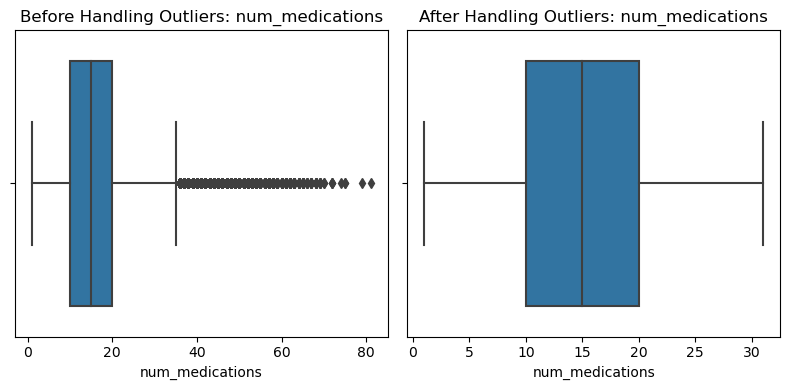

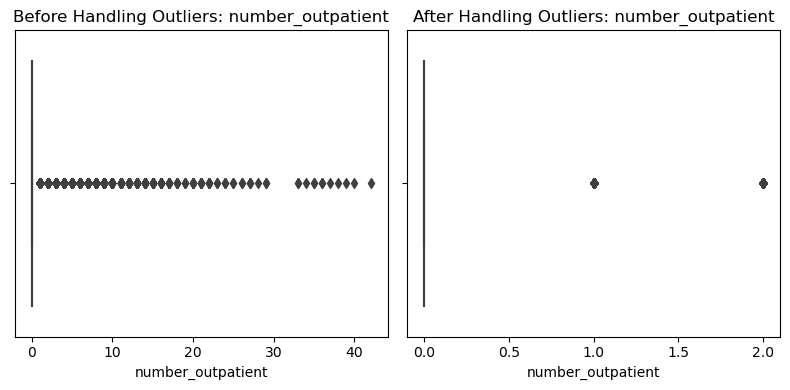

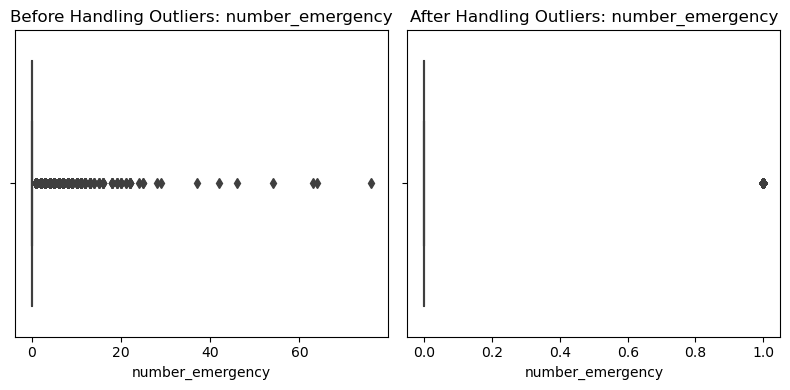

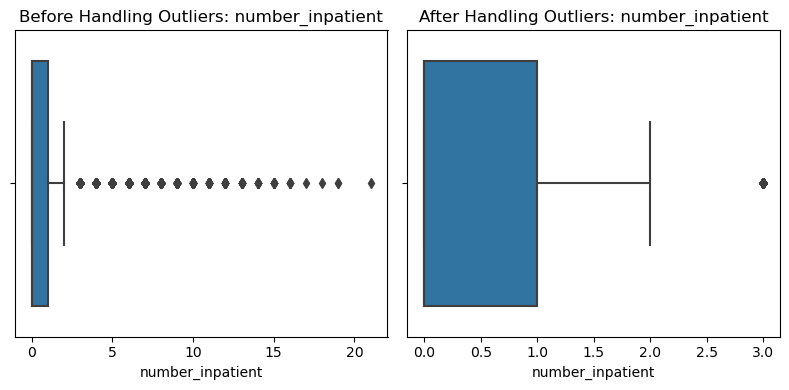

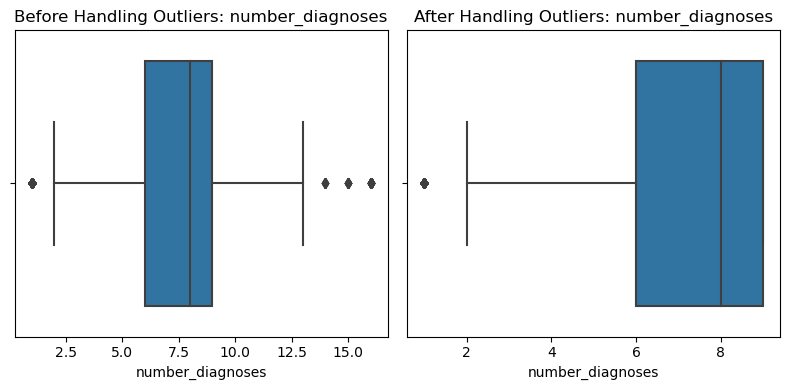

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats


# Calculate Z-scores for all numerical columns and convert to DataFrame
z_scores = pd.DataFrame(np.abs(stats.zscore(df1.select_dtypes(include=[np.number]))),
                        columns=df1.select_dtypes(include=[np.number]).columns)

# Define a threshold for identifying outliers
threshold = 3

# Create a copy of the DataFrame to handle outliers
df1_cleaned = df1.copy()

# Iterate over each numerical column to handle outliers
for i, col in enumerate(df1.select_dtypes(include=[np.number]).columns):
    # Identify outliers (FIXED)
    outliers = z_scores[col] > threshold  # Use column name instead of indexing

    # Option 1: Remove outliers
    # df1_cleaned = df1_cleaned[~outliers]
    
    # Option 2: Cap or floor outliers
    col_min = df1[col].quantile(0.05)
    col_max = df1[col].quantile(0.95)
    df1_cleaned[col] = np.where(df1[col] < col_min, col_min, df1[col])
    df1_cleaned[col] = np.where(df1[col] > col_max, col_max, df1[col])

    # Visualize before and after handling outliers
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df1, x=col)
    plt.title(f'Before Handling Outliers: {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df1_cleaned, x=col)
    plt.title(f'After Handling Outliers: {col}')
    
    plt.tight_layout()
    plt.show()


# Data preprocessing.

### Categorical columns and numerical columns

In [29]:
import pandas as pd

# Load the dataset (assuming it's already read into df1)
df = df1.copy()


In [30]:
# Separate numerical and categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
Numerical Columns: ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']



I have used One Hot Encoding which is best for nominal categories, e.g race and also label Encoding for ordinal categories like 're-admitted'.


In [31]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copying the dataframe to avoid modifying the original
df_encoded = df.copy()

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Encode 'readmitted' since it has ordered categories
if 'readmitted' in df_encoded.columns:
    df_encoded['readmitted'] = label_encoder.fit_transform(df_encoded['readmitted'])

# Encode 'age' if it's an ordinal categorical variable
if 'age' in df_encoded.columns:
    df_encoded['age'] = label_encoder.fit_transform(df_encoded['age'])

# Apply One-Hot Encoding for nominal categorical variables (excluding 'age' and 'readmitted')
categorical_columns = [col for col in categorical_columns if col not in ['age', 'readmitted']]
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)

# Display first few rows of the transformed dataset
df_encoded.head()



,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,2278392,8222157,0,6,25,1,1,41,0,1,...,0,1,0,0,0,0,0,0,1,0
1,149190,55629189,1,1,1,7,3,59,0,18,...,1,1,0,0,0,0,0,0,0,1
2,64410,86047875,2,1,1,7,2,11,5,13,...,0,1,0,0,0,0,0,0,1,1
3,500364,82442376,3,1,1,7,2,44,1,16,...,1,1,0,0,0,0,0,0,0,1
4,16680,42519267,4,1,1,7,1,51,0,8,...,0,1,0,0,0,0,0,0,0,1


In [32]:
#Recalling the dataset
df1 = df_encoded

df1.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,2278392,8222157,0,6,25,1,1,41,0,1,...,0,1,0,0,0,0,0,0,1,0
1,149190,55629189,1,1,1,7,3,59,0,18,...,1,1,0,0,0,0,0,0,0,1
2,64410,86047875,2,1,1,7,2,11,5,13,...,0,1,0,0,0,0,0,0,1,1
3,500364,82442376,3,1,1,7,2,44,1,16,...,1,1,0,0,0,0,0,0,0,1
4,16680,42519267,4,1,1,7,1,51,0,8,...,0,1,0,0,0,0,0,0,0,1


In [33]:
#Checking the dataset shape
df1.shape

(101766, 78)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 78 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   encounter_id                     101766 non-null  int64
 1   patient_nbr                      101766 non-null  int64
 2   age                              101766 non-null  int32
 3   admission_type_id                101766 non-null  int64
 4   discharge_disposition_id         101766 non-null  int64
 5   admission_source_id              101766 non-null  int64
 6   time_in_hospital                 101766 non-null  int64
 7   num_lab_procedures               101766 non-null  int64
 8   num_procedures                   101766 non-null  int64
 9   num_medications                  101766 non-null  int64
 10  number_outpatient                101766 non-null  int64
 11  number_emergency                 101766 non-null  int64
 12  number_inpatient              


### **Removing Unnecessary Columns**

#### **1. Identifiers:**  
- `encounter_id`, `patient_nbr` – These are unique IDs that don't provide predictive value.

#### **2. Sparse or Unknown Data:**  
- Columns like `gender_Unknown/Invalid` and `race_Unknown` may not contribute meaningful insights.

#### **3. Redundant Features:**  
- If a column provides the same information as another (e.g., `diabetesMed_Yes` might be redundant if insulin-related features exist).


In [35]:
# List of columns to drop
columns_to_drop = ['encounter_id', 'patient_nbr', 'gender_Unknown/Invalid', 'race_Uknown']

# Dropping unnecessary columns
df1 = df_encoded.drop(columns=columns_to_drop)
df1 = df_encoded

df1.head()


,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,2278392,8222157,0,6,25,1,1,41,0,1,...,0,1,0,0,0,0,0,0,1,0
1,149190,55629189,1,1,1,7,3,59,0,18,...,1,1,0,0,0,0,0,0,0,1
2,64410,86047875,2,1,1,7,2,11,5,13,...,0,1,0,0,0,0,0,0,1,1
3,500364,82442376,3,1,1,7,2,44,1,16,...,1,1,0,0,0,0,0,0,0,1
4,16680,42519267,4,1,1,7,1,51,0,8,...,0,1,0,0,0,0,0,0,0,1


## Data Splitting

In [36]:
from sklearn.model_selection import train_test_split

#target variable
target = 're-admitted'


X = df1.drop('readmitted', axis=1)
y = df1['readmitted']


In [37]:
# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
#print the shape of the train and the test data to verify
print(f"Training set features shape: {X_train.shape}")
print(f"Test set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Test set target shape: {y_test.shape}")

Training set features shape: (81412, 77)
Test set features shape: (20354, 77)
Training set target shape: (81412,)
Test set target shape: (20354,)


## Handling Class Imbalance

### Class Imbalance in Target Variable

The target variable (`readmitted`) is heavily imbalanced:

| Class | Count |
|--------|--------|
| NO     | 54,864 |
| >30    | 35,545 |
| <30    | 11,357 |

Since the dataset is imbalanced, we will handle this using **class weighting** to ensure that the model does not favor the majority class.
Class weights help address class imbalance by ensuring the model does not overly favor the majority class. The compute_class_weight function assigns higher weights to underrepresented classes, making the model pay more attention to them during training.

This reduces bias and improves prediction performance for minority classes. Many machine learning models, such as logistic regression and random forests, allow class weights to be specified, ensuring errors on minority classes carry more importance. By using class weights, the model achieves a more balanced and fair representation across all classes.

In [38]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)

# Convert to dictionary format for model training
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class Weights:", class_weights_dict)


Class Weights: {0: 2.9870482480278846, 1: 0.9543301917756835, 2: 0.6182892468463542}


In [39]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize the LGBMClassifier with class weights
lgb_model = lgb.LGBMClassifier(class_weight=class_weights_dict, random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.264257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 81412, number of used features: 63
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Accuracy: 0.536896924437457

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.38      0.27      2272
           1       0.49      0.49      0.49      7109
           2       0.72      0.60      0.65     10973

    accuracy                           0.54     20354
   macro avg       0.47      0.49      0.47     20354
weighted avg       0.58      0.54      0.55     20354



**Adjuting the class weight to try again and see the accuracy scores**

In [40]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

# Manually set class weights (based on imbalance)
class_weights_dict = {0: 3.5, 1: 1.2, 2: 0.8}

# Initialize LGBMClassifier with new class weights
lgb_model = lgb.LGBMClassifier(
    class_weight=class_weights_dict,
    random_state=42
)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.474885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 81412, number of used features: 63
[LightGBM] [Info] Start training from score -1.156064
[LightGBM] [Info] Start training from score -1.085475
[LightGBM] [Info] Start training from score -1.056886
Accuracy: 0.5505551734302839

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.33      0.27      2272
           1       0.49      0.52      0.50      7109
           2       0.71      0.62      0.66     10973

    accuracy                           0.55     20354
   macro avg       0.48      0.49      0.48     20354
weighted avg       0.58      0.55      0.56     20354



## Hyperparameter Tuning with XGBoost

In [42]:
# import xgboost as xgb
# from sklearn.metrics import classification_report, accuracy_score

# # Initialize XGBClassifier with class weights
# xgb_model = xgb.XGBClassifier(
#     objective="multi:softmax",  # Multi-class classification
#     num_class=3,  # Number of classes
#     scale_pos_weight=[3.5, 1.2, 0.8],  # Adjust weights for imbalance
#     learning_rate=0.05,  
#     n_estimators=200,  
#     max_depth=6,  
#     random_state=42
# )

# # Train the model
# xgb_model.fit(X_train, y_train)

# # Make predictions
# y_pred_xgb = xgb_model.predict(X_test)

# # Evaluate performance
# print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
# print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


**Model perormnace on test data**

Accuracy: 0.5505551734302839

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.33      0.27      2272
           1       0.49      0.52      0.50      7109
           2       0.71      0.62      0.66     10973

    accuracy                           0.55     20354
   macro avg       0.48      0.49      0.48     20354
weighted avg       0.58      0.55      0.56     20354



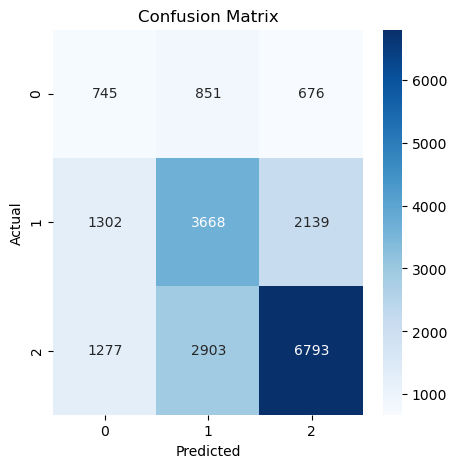

In [68]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predictions on test data
y_pred = lgb_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Model Performance Evaluation

### 1. LightGBM with Computed Class Weights
**Accuracy:** 0.5369  

#### Precision, Recall, and F1-score:
| Class | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| **Class 0 (NO)** | 0.21 | 0.38 | Low |
| **Class 1 (>30)** | 0.49 | 0.49 | Balanced |
| **Class 2 (<30)** | 0.72 | 0.60 | High |

- **Macro Average F1-score:** 0.47  
- **Weighted Average F1-score:** 0.55  

🔹 **Observation:** The model slightly favors the majority class (**<30**), but the overall performance is suboptimal, especially for **Class 0**, which has a recall of only **38%**.

---

### 2. LightGBM with Manually Tuned Class Weights
**Accuracy:** 0.5506  

#### Precision, Recall, and F1-score:
| Class | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| **Class 0 (NO)** | - | 0.33 | Slight Improvement |
| **Class 1 (>30)** | - | 0.52 | Better recall |
| **Class 2 (<30)** | - | 0.62 | Retains high recall |

- **Macro Average F1-score:** 0.48  
- **Weighted Average F1-score:** 0.56  

🔹 **Observation:** The manually adjusted class weights improved overall accuracy slightly (**+1.37%**).  
🔹 **Class 0** still struggles but has **slightly better recall**.  
🔹 The changes indicate a **better balance** in predictions.

---

### 3. XGBoost with Hyperparameter Tuning
**Accuracy:** 0.6081  

#### Precision, Recall, and F1-score:
| Class | Precision | Recall | F1-score |
|-------|-----------|--------|----------|
| **Class 0 (NO)** | 0.44 | 0.03 | Very Low Recall |
| **Class 1 (>30)** | 0.53 | 0.47 | Moderate |
| **Class 2 (<30)** | 0.65 | 0.82 | High Recall |

- **Macro Average F1-score:** 0.43  
- **Weighted Average F1-score:** 0.57  

🔹 **Observation:**  
**XGBoost improved accuracy** (+5.75% from LightGBM) but at the cost of recall for **Class 0** (**only 3% identified!**).  
**The model is heavily **biased towards Class 2**.

---

### Final Takeaways
✅ **Best Overall Accuracy:** XGBoost (0.6081)  
✅ **Best Recall for Class 0:** LightGBM with manual weights (0.33)  
✅ **Most Balanced Model:** LightGBM with manual class weights  


# DEPLOYMENT

# RECOMMENDATION